In [174]:
import keras
import numpy as np
from sklearn import model_selection, preprocessing, metrics, utils
import pandas as pd
import matplotlib.pyplot as plt
#import fraudutils as futils
rs = 1

In [175]:
# Defining useful function
def plot_mnist(pixels, label):
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray', )
    plt.show()

In [176]:
optimizer = keras.optimizers.Adam(0.0002, 0.5)

In [177]:
# Loading datasets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [178]:
# Defining Generator

model = keras.models.Sequential()

model.add(keras.layers.Dense(256, input_dim=100))
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.BatchNormalization(momentum=0.8))
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.BatchNormalization(momentum=0.8))
model.add(keras.layers.Dense(1024))
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.BatchNormalization(momentum=0.8))
model.add(keras.layers.Dense(784, activation='tanh'))

noise = keras.layers.Input(shape=(100,))
label = keras.layers.Input(shape=(1,))
label_embedding = keras.layers.Flatten()(keras.layers.Embedding(10, 100)(label))

model_input = keras.layers.multiply([noise, label_embedding])
img = model(model_input)

generator = keras.models.Model([noise, label], img)

In [179]:
# Defining Discriminator

model = keras.models.Sequential()

model.add(keras.layers.Dense(512, input_dim=784))
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1, activation='sigmoid'))

img = keras.layers.Input(shape=(784,))
label = keras.layers.Input(shape=(1,))

label_embedding = keras.layers.Flatten()(keras.layers.Embedding(10, 784)(label))
model_input = keras.layers.multiply([img, label_embedding])

validity = model(model_input)

discriminator = keras.models.Model([img, label], validity)
discriminator.compile(optimizer=optimizer,
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [180]:
# Generating unified model

noise = keras.layers.Input(shape=(100,))
label = keras.layers.Input(shape=(1,))
img = generator([noise, label])

discriminator.trainable = False

valid = discriminator([img, label])

gan = keras.models.Model([noise, label], valid)
gan.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['acc'])

In [181]:
# Preparing Dataset

X_train_reshaped = X_train.reshape(-1, 784)
X_train_reshaped = (X_train_reshaped - 127.5) / 127.5

y_train_reshaped = y_train.reshape(-1, 1)

/home/mikael/Dev/data-science-env/lib/python3.6/site-packages/keras/engine/training.py:478: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.051014, acc.: 100.00%] [G loss: 4.441086]


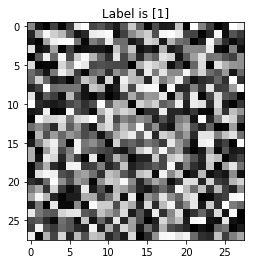

1 [D loss: 0.047399, acc.: 100.00%] [G loss: 4.081954]
2 [D loss: 0.116690, acc.: 95.31%] [G loss: 4.846025]
3 [D loss: 0.062153, acc.: 98.44%] [G loss: 4.792384]
4 [D loss: 0.029926, acc.: 100.00%] [G loss: 4.382589]
5 [D loss: 0.051395, acc.: 98.44%] [G loss: 4.837732]
6 [D loss: 0.013644, acc.: 100.00%] [G loss: 5.264569]
7 [D loss: 0.034278, acc.: 100.00%] [G loss: 5.158928]
8 [D loss: 0.026572, acc.: 100.00%] [G loss: 5.337210]
9 [D loss: 0.014674, acc.: 100.00%] [G loss: 5.420875]
10 [D loss: 0.042102, acc.: 100.00%] [G loss: 5.978947]
11 [D loss: 0.031718, acc.: 100.00%] [G loss: 5.465450]
12 [D loss: 0.025006, acc.: 100.00%] [G loss: 5.381706]
13 [D loss: 0.061986, acc.: 98.44%] [G loss: 6.328014]
14 [D loss: 0.014987, acc.: 100.00%] [G loss: 6.139813]
15 [D loss: 0.046776, acc.: 98.44%] [G loss: 5.329432]
16 [D loss: 0.063153, acc.: 95.31%] [G loss: 6.125311]
17 [D loss: 0.053553, acc.: 98.44%] [G loss: 6.724436]
18 [D loss: 0.047277, acc.: 100.00%] [G loss: 6.228152]
19 [D lo

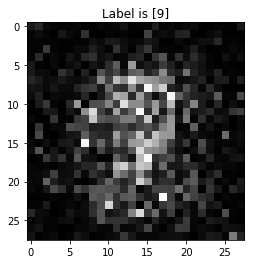

201 [D loss: 0.374989, acc.: 82.81%] [G loss: 4.486253]
202 [D loss: 0.346131, acc.: 90.62%] [G loss: 4.620366]
203 [D loss: 0.639529, acc.: 60.94%] [G loss: 3.817632]
204 [D loss: 0.538749, acc.: 73.44%] [G loss: 3.391145]
205 [D loss: 0.583297, acc.: 71.88%] [G loss: 4.543891]
206 [D loss: 0.541673, acc.: 75.00%] [G loss: 4.623330]
207 [D loss: 0.353426, acc.: 82.81%] [G loss: 4.149969]
208 [D loss: 0.408418, acc.: 87.50%] [G loss: 4.147091]
209 [D loss: 0.438667, acc.: 84.38%] [G loss: 5.037692]
210 [D loss: 0.391998, acc.: 82.81%] [G loss: 3.789496]
211 [D loss: 0.518573, acc.: 71.88%] [G loss: 3.933550]
212 [D loss: 0.341138, acc.: 89.06%] [G loss: 4.184278]
213 [D loss: 0.519249, acc.: 71.88%] [G loss: 4.221366]
214 [D loss: 0.555776, acc.: 67.19%] [G loss: 5.163004]
215 [D loss: 0.437156, acc.: 78.12%] [G loss: 3.948026]
216 [D loss: 0.513834, acc.: 71.88%] [G loss: 3.127925]
217 [D loss: 0.454803, acc.: 78.12%] [G loss: 3.257006]
218 [D loss: 0.399274, acc.: 79.69%] [G loss: 3.

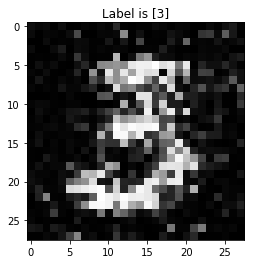

401 [D loss: 0.510661, acc.: 75.00%] [G loss: 1.784235]
402 [D loss: 0.555470, acc.: 75.00%] [G loss: 1.752706]
403 [D loss: 0.497708, acc.: 76.56%] [G loss: 1.803385]
404 [D loss: 0.597260, acc.: 71.88%] [G loss: 1.520311]
405 [D loss: 0.533951, acc.: 73.44%] [G loss: 1.668626]
406 [D loss: 0.526156, acc.: 70.31%] [G loss: 1.584598]
407 [D loss: 0.588685, acc.: 78.12%] [G loss: 1.429267]
408 [D loss: 0.487696, acc.: 73.44%] [G loss: 1.603687]
409 [D loss: 0.466472, acc.: 82.81%] [G loss: 1.491564]
410 [D loss: 0.486817, acc.: 73.44%] [G loss: 1.521037]
411 [D loss: 0.562500, acc.: 71.88%] [G loss: 1.432248]
412 [D loss: 0.498475, acc.: 79.69%] [G loss: 1.798966]
413 [D loss: 0.514061, acc.: 79.69%] [G loss: 1.628374]
414 [D loss: 0.520468, acc.: 68.75%] [G loss: 1.825618]
415 [D loss: 0.464750, acc.: 78.12%] [G loss: 1.696013]
416 [D loss: 0.616067, acc.: 64.06%] [G loss: 1.594343]
417 [D loss: 0.515202, acc.: 75.00%] [G loss: 1.721118]
418 [D loss: 0.588463, acc.: 76.56%] [G loss: 1.

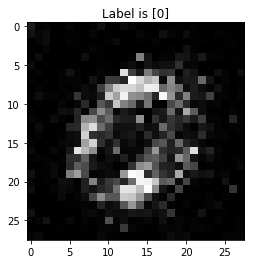

601 [D loss: 0.494385, acc.: 79.69%] [G loss: 1.637939]
602 [D loss: 0.542930, acc.: 79.69%] [G loss: 1.396867]
603 [D loss: 0.474100, acc.: 78.12%] [G loss: 1.437518]
604 [D loss: 0.445111, acc.: 82.81%] [G loss: 1.423634]
605 [D loss: 0.600658, acc.: 68.75%] [G loss: 1.443828]
606 [D loss: 0.553174, acc.: 68.75%] [G loss: 1.512734]
607 [D loss: 0.564380, acc.: 75.00%] [G loss: 1.451318]
608 [D loss: 0.690454, acc.: 54.69%] [G loss: 1.424206]
609 [D loss: 0.533737, acc.: 71.88%] [G loss: 1.387330]
610 [D loss: 0.580664, acc.: 67.19%] [G loss: 1.406299]
611 [D loss: 0.555104, acc.: 75.00%] [G loss: 1.426078]
612 [D loss: 0.580529, acc.: 67.19%] [G loss: 1.384635]
613 [D loss: 0.625990, acc.: 65.62%] [G loss: 1.385636]
614 [D loss: 0.576192, acc.: 68.75%] [G loss: 1.444118]
615 [D loss: 0.512454, acc.: 73.44%] [G loss: 1.555620]
616 [D loss: 0.599704, acc.: 67.19%] [G loss: 1.361518]
617 [D loss: 0.593703, acc.: 67.19%] [G loss: 1.513952]
618 [D loss: 0.529816, acc.: 75.00%] [G loss: 1.

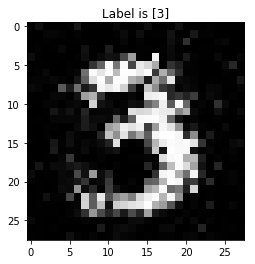

801 [D loss: 0.596119, acc.: 71.88%] [G loss: 1.241867]
802 [D loss: 0.634524, acc.: 59.38%] [G loss: 1.149371]
803 [D loss: 0.519451, acc.: 78.12%] [G loss: 1.216136]
804 [D loss: 0.570490, acc.: 73.44%] [G loss: 1.240704]
805 [D loss: 0.522709, acc.: 76.56%] [G loss: 1.228662]
806 [D loss: 0.628458, acc.: 64.06%] [G loss: 1.153869]
807 [D loss: 0.575647, acc.: 60.94%] [G loss: 1.379702]
808 [D loss: 0.513528, acc.: 73.44%] [G loss: 1.494194]
809 [D loss: 0.671596, acc.: 64.06%] [G loss: 1.251352]
810 [D loss: 0.621666, acc.: 64.06%] [G loss: 1.174852]
811 [D loss: 0.661817, acc.: 60.94%] [G loss: 1.188113]
812 [D loss: 0.693064, acc.: 54.69%] [G loss: 1.063634]
813 [D loss: 0.574111, acc.: 73.44%] [G loss: 1.326960]
814 [D loss: 0.679150, acc.: 65.62%] [G loss: 1.294616]
815 [D loss: 0.548455, acc.: 73.44%] [G loss: 1.185227]
816 [D loss: 0.647332, acc.: 70.31%] [G loss: 1.237914]
817 [D loss: 0.495547, acc.: 76.56%] [G loss: 1.204458]
818 [D loss: 0.708124, acc.: 57.81%] [G loss: 1.

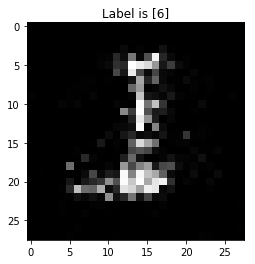

1001 [D loss: 0.717476, acc.: 51.56%] [G loss: 1.173140]
1002 [D loss: 0.651832, acc.: 65.62%] [G loss: 1.085621]
1003 [D loss: 0.651476, acc.: 67.19%] [G loss: 1.060663]
1004 [D loss: 0.565132, acc.: 75.00%] [G loss: 1.079580]
1005 [D loss: 0.599398, acc.: 75.00%] [G loss: 1.154008]
1006 [D loss: 0.558020, acc.: 70.31%] [G loss: 1.136706]
1007 [D loss: 0.687343, acc.: 54.69%] [G loss: 1.267208]
1008 [D loss: 0.647171, acc.: 56.25%] [G loss: 1.260872]
1009 [D loss: 0.699455, acc.: 57.81%] [G loss: 1.096744]
1010 [D loss: 0.648722, acc.: 65.62%] [G loss: 1.169104]
1011 [D loss: 0.667744, acc.: 62.50%] [G loss: 1.189140]
1012 [D loss: 0.629741, acc.: 64.06%] [G loss: 1.147803]
1013 [D loss: 0.659715, acc.: 54.69%] [G loss: 1.146551]
1014 [D loss: 0.596427, acc.: 65.62%] [G loss: 1.163567]
1015 [D loss: 0.578345, acc.: 67.19%] [G loss: 1.037870]
1016 [D loss: 0.605883, acc.: 64.06%] [G loss: 0.967658]
1017 [D loss: 0.533285, acc.: 73.44%] [G loss: 0.905247]
1018 [D loss: 0.620717, acc.: 6

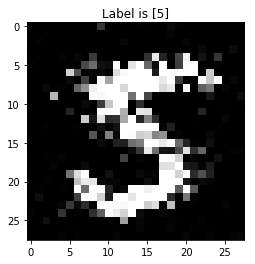

1201 [D loss: 0.667367, acc.: 65.62%] [G loss: 1.098395]
1202 [D loss: 0.562484, acc.: 70.31%] [G loss: 1.129692]
1203 [D loss: 0.630627, acc.: 64.06%] [G loss: 1.151818]
1204 [D loss: 0.613754, acc.: 71.88%] [G loss: 1.095089]
1205 [D loss: 0.675137, acc.: 57.81%] [G loss: 1.080703]
1206 [D loss: 0.625442, acc.: 67.19%] [G loss: 1.086878]
1207 [D loss: 0.638815, acc.: 64.06%] [G loss: 0.973511]
1208 [D loss: 0.657779, acc.: 64.06%] [G loss: 1.130461]
1209 [D loss: 0.622457, acc.: 62.50%] [G loss: 1.061977]
1210 [D loss: 0.622567, acc.: 70.31%] [G loss: 1.017022]
1211 [D loss: 0.618766, acc.: 64.06%] [G loss: 0.984516]
1212 [D loss: 0.620256, acc.: 65.62%] [G loss: 1.029506]
1213 [D loss: 0.632774, acc.: 65.62%] [G loss: 1.101069]
1214 [D loss: 0.730313, acc.: 59.38%] [G loss: 1.124716]
1215 [D loss: 0.651780, acc.: 57.81%] [G loss: 1.131706]
1216 [D loss: 0.614054, acc.: 65.62%] [G loss: 1.068181]
1217 [D loss: 0.657757, acc.: 57.81%] [G loss: 1.019369]
1218 [D loss: 0.577375, acc.: 7

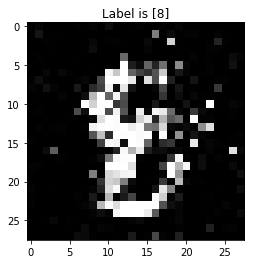

1401 [D loss: 0.641518, acc.: 59.38%] [G loss: 1.113498]
1402 [D loss: 0.635133, acc.: 59.38%] [G loss: 1.087479]
1403 [D loss: 0.599923, acc.: 65.62%] [G loss: 1.019489]
1404 [D loss: 0.610515, acc.: 67.19%] [G loss: 0.916028]
1405 [D loss: 0.669178, acc.: 56.25%] [G loss: 0.972962]
1406 [D loss: 0.662952, acc.: 64.06%] [G loss: 1.016223]
1407 [D loss: 0.598759, acc.: 68.75%] [G loss: 1.030564]
1408 [D loss: 0.631646, acc.: 59.38%] [G loss: 1.125708]
1409 [D loss: 0.707238, acc.: 60.94%] [G loss: 1.220459]
1410 [D loss: 0.632156, acc.: 71.88%] [G loss: 1.183524]
1411 [D loss: 0.588875, acc.: 75.00%] [G loss: 1.096871]
1412 [D loss: 0.610654, acc.: 67.19%] [G loss: 0.950999]
1413 [D loss: 0.691034, acc.: 59.38%] [G loss: 0.977010]
1414 [D loss: 0.658952, acc.: 60.94%] [G loss: 1.068976]
1415 [D loss: 0.623587, acc.: 65.62%] [G loss: 1.129890]
1416 [D loss: 0.673681, acc.: 62.50%] [G loss: 1.124473]
1417 [D loss: 0.638696, acc.: 65.62%] [G loss: 1.098568]
1418 [D loss: 0.580690, acc.: 6

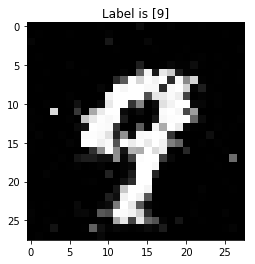

1601 [D loss: 0.636613, acc.: 65.62%] [G loss: 0.908363]
1602 [D loss: 0.682356, acc.: 57.81%] [G loss: 0.889141]
1603 [D loss: 0.634670, acc.: 60.94%] [G loss: 0.896795]
1604 [D loss: 0.660913, acc.: 54.69%] [G loss: 0.840059]
1605 [D loss: 0.633962, acc.: 62.50%] [G loss: 0.848696]
1606 [D loss: 0.718160, acc.: 50.00%] [G loss: 0.971395]
1607 [D loss: 0.640109, acc.: 59.38%] [G loss: 1.043100]
1608 [D loss: 0.668118, acc.: 65.62%] [G loss: 0.897358]
1609 [D loss: 0.656417, acc.: 64.06%] [G loss: 0.863045]
1610 [D loss: 0.681071, acc.: 57.81%] [G loss: 0.919172]
1611 [D loss: 0.722151, acc.: 45.31%] [G loss: 0.869605]
1612 [D loss: 0.659706, acc.: 60.94%] [G loss: 0.949186]
1613 [D loss: 0.651857, acc.: 62.50%] [G loss: 0.989520]
1614 [D loss: 0.628449, acc.: 65.62%] [G loss: 0.939924]
1615 [D loss: 0.673600, acc.: 57.81%] [G loss: 1.024398]
1616 [D loss: 0.643075, acc.: 68.75%] [G loss: 0.992037]
1617 [D loss: 0.659345, acc.: 59.38%] [G loss: 0.871237]
1618 [D loss: 0.653663, acc.: 5

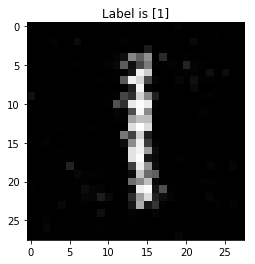

1801 [D loss: 0.656441, acc.: 62.50%] [G loss: 0.955434]
1802 [D loss: 0.624483, acc.: 68.75%] [G loss: 0.986485]
1803 [D loss: 0.659713, acc.: 60.94%] [G loss: 0.947747]
1804 [D loss: 0.663007, acc.: 67.19%] [G loss: 0.949963]
1805 [D loss: 0.607222, acc.: 64.06%] [G loss: 0.958803]
1806 [D loss: 0.665491, acc.: 60.94%] [G loss: 1.000709]
1807 [D loss: 0.632319, acc.: 59.38%] [G loss: 0.968704]
1808 [D loss: 0.650768, acc.: 67.19%] [G loss: 0.941224]
1809 [D loss: 0.698301, acc.: 50.00%] [G loss: 0.970693]
1810 [D loss: 0.637834, acc.: 65.62%] [G loss: 0.983159]
1811 [D loss: 0.662524, acc.: 64.06%] [G loss: 0.906614]
1812 [D loss: 0.591615, acc.: 70.31%] [G loss: 0.941338]
1813 [D loss: 0.603142, acc.: 64.06%] [G loss: 0.826141]
1814 [D loss: 0.637421, acc.: 53.12%] [G loss: 0.965015]
1815 [D loss: 0.660587, acc.: 59.38%] [G loss: 0.944981]
1816 [D loss: 0.577691, acc.: 67.19%] [G loss: 1.030428]
1817 [D loss: 0.636534, acc.: 62.50%] [G loss: 0.982711]
1818 [D loss: 0.635759, acc.: 6

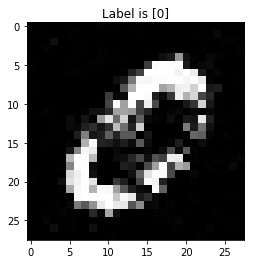

2001 [D loss: 0.680133, acc.: 57.81%] [G loss: 0.836129]
2002 [D loss: 0.655146, acc.: 57.81%] [G loss: 0.900576]
2003 [D loss: 0.636049, acc.: 54.69%] [G loss: 0.884293]
2004 [D loss: 0.712865, acc.: 64.06%] [G loss: 0.903183]
2005 [D loss: 0.668937, acc.: 53.12%] [G loss: 0.867618]
2006 [D loss: 0.675943, acc.: 60.94%] [G loss: 0.860716]
2007 [D loss: 0.657540, acc.: 59.38%] [G loss: 0.884119]
2008 [D loss: 0.636135, acc.: 62.50%] [G loss: 0.894499]
2009 [D loss: 0.645145, acc.: 62.50%] [G loss: 0.884771]
2010 [D loss: 0.664480, acc.: 62.50%] [G loss: 0.848514]
2011 [D loss: 0.657150, acc.: 60.94%] [G loss: 0.901164]
2012 [D loss: 0.618452, acc.: 64.06%] [G loss: 0.862989]
2013 [D loss: 0.666465, acc.: 59.38%] [G loss: 0.875892]
2014 [D loss: 0.591034, acc.: 60.94%] [G loss: 0.937832]
2015 [D loss: 0.680244, acc.: 56.25%] [G loss: 0.932635]
2016 [D loss: 0.701182, acc.: 56.25%] [G loss: 0.816762]
2017 [D loss: 0.665771, acc.: 59.38%] [G loss: 0.904277]
2018 [D loss: 0.653129, acc.: 6

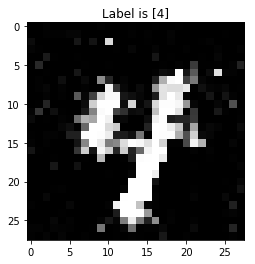

2201 [D loss: 0.627421, acc.: 65.62%] [G loss: 0.921714]
2202 [D loss: 0.614782, acc.: 62.50%] [G loss: 0.938039]
2203 [D loss: 0.667915, acc.: 60.94%] [G loss: 0.847908]
2204 [D loss: 0.631896, acc.: 64.06%] [G loss: 0.862692]
2205 [D loss: 0.644411, acc.: 65.62%] [G loss: 0.855377]
2206 [D loss: 0.609732, acc.: 73.44%] [G loss: 0.884996]
2207 [D loss: 0.654266, acc.: 64.06%] [G loss: 0.906379]
2208 [D loss: 0.641204, acc.: 60.94%] [G loss: 0.808793]
2209 [D loss: 0.615102, acc.: 68.75%] [G loss: 0.887754]
2210 [D loss: 0.718369, acc.: 53.12%] [G loss: 0.863847]
2211 [D loss: 0.665019, acc.: 59.38%] [G loss: 0.931747]
2212 [D loss: 0.682567, acc.: 59.38%] [G loss: 0.870469]
2213 [D loss: 0.620253, acc.: 60.94%] [G loss: 0.852437]
2214 [D loss: 0.702003, acc.: 56.25%] [G loss: 0.850953]
2215 [D loss: 0.625291, acc.: 62.50%] [G loss: 0.867136]
2216 [D loss: 0.648739, acc.: 62.50%] [G loss: 0.842194]
2217 [D loss: 0.649347, acc.: 57.81%] [G loss: 0.898726]
2218 [D loss: 0.668648, acc.: 6

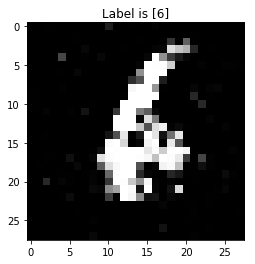

2401 [D loss: 0.658738, acc.: 59.38%] [G loss: 0.839509]
2402 [D loss: 0.639099, acc.: 59.38%] [G loss: 0.875855]
2403 [D loss: 0.707523, acc.: 53.12%] [G loss: 0.874999]
2404 [D loss: 0.670287, acc.: 60.94%] [G loss: 0.931281]
2405 [D loss: 0.632422, acc.: 59.38%] [G loss: 0.836029]
2406 [D loss: 0.672118, acc.: 62.50%] [G loss: 0.793339]
2407 [D loss: 0.659894, acc.: 59.38%] [G loss: 0.826787]
2408 [D loss: 0.664850, acc.: 56.25%] [G loss: 0.868747]
2409 [D loss: 0.669928, acc.: 54.69%] [G loss: 0.872240]
2410 [D loss: 0.676838, acc.: 50.00%] [G loss: 0.902956]
2411 [D loss: 0.686691, acc.: 54.69%] [G loss: 0.893735]
2412 [D loss: 0.604701, acc.: 62.50%] [G loss: 0.956021]
2413 [D loss: 0.632202, acc.: 64.06%] [G loss: 0.856863]
2414 [D loss: 0.678415, acc.: 56.25%] [G loss: 0.893114]
2415 [D loss: 0.624686, acc.: 57.81%] [G loss: 0.851493]
2416 [D loss: 0.643014, acc.: 60.94%] [G loss: 0.955455]
2417 [D loss: 0.641003, acc.: 60.94%] [G loss: 0.950470]
2418 [D loss: 0.681447, acc.: 5

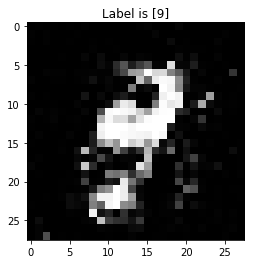

2601 [D loss: 0.709778, acc.: 53.12%] [G loss: 0.853316]
2602 [D loss: 0.611684, acc.: 68.75%] [G loss: 0.841335]
2603 [D loss: 0.674236, acc.: 51.56%] [G loss: 0.845966]
2604 [D loss: 0.705393, acc.: 57.81%] [G loss: 0.869701]
2605 [D loss: 0.657306, acc.: 54.69%] [G loss: 0.837363]
2606 [D loss: 0.646755, acc.: 64.06%] [G loss: 0.921436]
2607 [D loss: 0.669744, acc.: 54.69%] [G loss: 0.798473]
2608 [D loss: 0.692473, acc.: 54.69%] [G loss: 0.870846]
2609 [D loss: 0.665108, acc.: 60.94%] [G loss: 0.810897]
2610 [D loss: 0.632173, acc.: 59.38%] [G loss: 0.871412]
2611 [D loss: 0.665247, acc.: 62.50%] [G loss: 0.880310]
2612 [D loss: 0.678761, acc.: 54.69%] [G loss: 0.793252]
2613 [D loss: 0.666604, acc.: 60.94%] [G loss: 0.842936]
2614 [D loss: 0.621669, acc.: 73.44%] [G loss: 0.825215]
2615 [D loss: 0.745377, acc.: 46.88%] [G loss: 0.836420]
2616 [D loss: 0.576220, acc.: 76.56%] [G loss: 0.874745]
2617 [D loss: 0.686707, acc.: 54.69%] [G loss: 0.841305]
2618 [D loss: 0.695426, acc.: 5

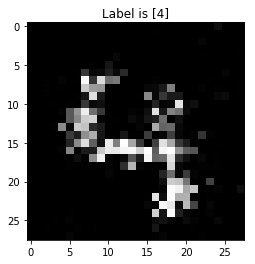

2801 [D loss: 0.706686, acc.: 51.56%] [G loss: 0.843218]
2802 [D loss: 0.642789, acc.: 54.69%] [G loss: 0.836944]
2803 [D loss: 0.680634, acc.: 51.56%] [G loss: 0.854695]
2804 [D loss: 0.681000, acc.: 56.25%] [G loss: 0.832759]
2805 [D loss: 0.674914, acc.: 59.38%] [G loss: 0.868290]
2806 [D loss: 0.692116, acc.: 56.25%] [G loss: 0.845308]
2807 [D loss: 0.671250, acc.: 57.81%] [G loss: 0.866294]
2808 [D loss: 0.636591, acc.: 67.19%] [G loss: 0.864734]
2809 [D loss: 0.673763, acc.: 59.38%] [G loss: 0.827527]
2810 [D loss: 0.643813, acc.: 60.94%] [G loss: 0.838281]
2811 [D loss: 0.640129, acc.: 62.50%] [G loss: 0.940116]
2812 [D loss: 0.656045, acc.: 56.25%] [G loss: 0.751389]
2813 [D loss: 0.704029, acc.: 56.25%] [G loss: 0.842180]
2814 [D loss: 0.673510, acc.: 56.25%] [G loss: 0.934624]
2815 [D loss: 0.669497, acc.: 59.38%] [G loss: 0.867942]
2816 [D loss: 0.673397, acc.: 57.81%] [G loss: 0.872373]
2817 [D loss: 0.669816, acc.: 54.69%] [G loss: 0.881572]
2818 [D loss: 0.642786, acc.: 6

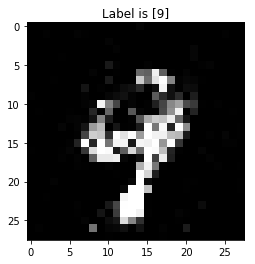

3001 [D loss: 0.650604, acc.: 60.94%] [G loss: 0.802735]
3002 [D loss: 0.694852, acc.: 45.31%] [G loss: 0.838966]
3003 [D loss: 0.615336, acc.: 71.88%] [G loss: 0.843739]
3004 [D loss: 0.636073, acc.: 60.94%] [G loss: 0.821154]
3005 [D loss: 0.682206, acc.: 54.69%] [G loss: 0.794880]
3006 [D loss: 0.650876, acc.: 60.94%] [G loss: 0.814448]
3007 [D loss: 0.634458, acc.: 64.06%] [G loss: 0.775657]
3008 [D loss: 0.629238, acc.: 67.19%] [G loss: 0.802789]
3009 [D loss: 0.668711, acc.: 56.25%] [G loss: 0.809855]
3010 [D loss: 0.684864, acc.: 54.69%] [G loss: 0.810526]
3011 [D loss: 0.642605, acc.: 64.06%] [G loss: 0.823465]
3012 [D loss: 0.634174, acc.: 59.38%] [G loss: 0.855063]
3013 [D loss: 0.628989, acc.: 62.50%] [G loss: 0.841860]
3014 [D loss: 0.693303, acc.: 56.25%] [G loss: 0.881755]
3015 [D loss: 0.587285, acc.: 57.81%] [G loss: 0.859588]
3016 [D loss: 0.670485, acc.: 54.69%] [G loss: 0.859266]
3017 [D loss: 0.670190, acc.: 51.56%] [G loss: 0.910772]
3018 [D loss: 0.711602, acc.: 5

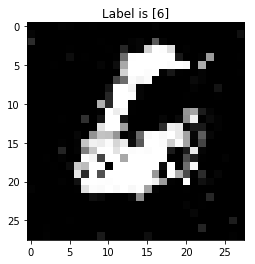

3201 [D loss: 0.667379, acc.: 59.38%] [G loss: 0.852190]
3202 [D loss: 0.666248, acc.: 57.81%] [G loss: 0.818846]
3203 [D loss: 0.634322, acc.: 67.19%] [G loss: 0.862098]
3204 [D loss: 0.692523, acc.: 56.25%] [G loss: 0.863159]
3205 [D loss: 0.682062, acc.: 53.12%] [G loss: 0.862519]
3206 [D loss: 0.687218, acc.: 56.25%] [G loss: 0.873872]
3207 [D loss: 0.655681, acc.: 65.62%] [G loss: 0.889069]
3208 [D loss: 0.648148, acc.: 59.38%] [G loss: 0.854514]
3209 [D loss: 0.641673, acc.: 57.81%] [G loss: 0.912537]
3210 [D loss: 0.681367, acc.: 48.44%] [G loss: 0.871491]
3211 [D loss: 0.637414, acc.: 60.94%] [G loss: 0.869851]
3212 [D loss: 0.607244, acc.: 67.19%] [G loss: 0.858960]
3213 [D loss: 0.682065, acc.: 56.25%] [G loss: 0.824924]
3214 [D loss: 0.650325, acc.: 62.50%] [G loss: 0.914979]
3215 [D loss: 0.634039, acc.: 60.94%] [G loss: 0.870095]
3216 [D loss: 0.685220, acc.: 46.88%] [G loss: 0.883495]
3217 [D loss: 0.643010, acc.: 65.62%] [G loss: 0.905157]
3218 [D loss: 0.635494, acc.: 6

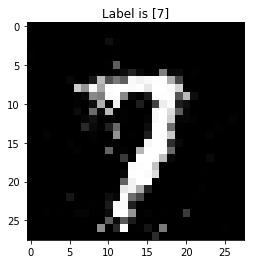

3401 [D loss: 0.704372, acc.: 48.44%] [G loss: 0.925434]
3402 [D loss: 0.693314, acc.: 50.00%] [G loss: 0.879386]
3403 [D loss: 0.650184, acc.: 62.50%] [G loss: 0.869656]
3404 [D loss: 0.672638, acc.: 51.56%] [G loss: 0.892579]
3405 [D loss: 0.650233, acc.: 62.50%] [G loss: 0.860955]
3406 [D loss: 0.663950, acc.: 60.94%] [G loss: 0.823802]
3407 [D loss: 0.639669, acc.: 59.38%] [G loss: 0.825100]
3408 [D loss: 0.679423, acc.: 53.12%] [G loss: 0.814581]
3409 [D loss: 0.687449, acc.: 56.25%] [G loss: 0.849573]
3410 [D loss: 0.711010, acc.: 48.44%] [G loss: 0.843775]
3411 [D loss: 0.670423, acc.: 65.62%] [G loss: 0.881052]
3412 [D loss: 0.645270, acc.: 62.50%] [G loss: 0.899943]
3413 [D loss: 0.677333, acc.: 53.12%] [G loss: 0.856709]
3414 [D loss: 0.663997, acc.: 54.69%] [G loss: 0.774541]
3415 [D loss: 0.647416, acc.: 67.19%] [G loss: 0.756262]
3416 [D loss: 0.724591, acc.: 46.88%] [G loss: 0.837498]
3417 [D loss: 0.673113, acc.: 54.69%] [G loss: 0.860654]
3418 [D loss: 0.683142, acc.: 5

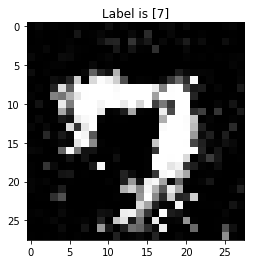

3601 [D loss: 0.713747, acc.: 59.38%] [G loss: 0.784940]
3602 [D loss: 0.634977, acc.: 60.94%] [G loss: 0.860565]
3603 [D loss: 0.641601, acc.: 54.69%] [G loss: 0.778286]
3604 [D loss: 0.673396, acc.: 59.38%] [G loss: 0.796466]
3605 [D loss: 0.707635, acc.: 53.12%] [G loss: 0.898660]
3606 [D loss: 0.665190, acc.: 57.81%] [G loss: 0.861895]
3607 [D loss: 0.674888, acc.: 53.12%] [G loss: 0.851626]
3608 [D loss: 0.611981, acc.: 64.06%] [G loss: 0.858420]
3609 [D loss: 0.657025, acc.: 59.38%] [G loss: 0.820293]
3610 [D loss: 0.652736, acc.: 57.81%] [G loss: 0.903450]
3611 [D loss: 0.719069, acc.: 43.75%] [G loss: 0.814824]
3612 [D loss: 0.637915, acc.: 68.75%] [G loss: 0.887651]
3613 [D loss: 0.652039, acc.: 57.81%] [G loss: 0.847245]
3614 [D loss: 0.682360, acc.: 53.12%] [G loss: 0.863159]
3615 [D loss: 0.671376, acc.: 54.69%] [G loss: 0.867977]
3616 [D loss: 0.662752, acc.: 65.62%] [G loss: 0.866090]
3617 [D loss: 0.697507, acc.: 48.44%] [G loss: 0.836264]
3618 [D loss: 0.716429, acc.: 4

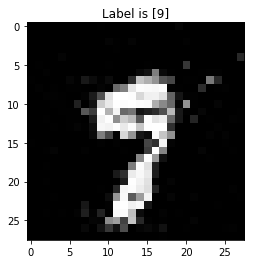

3801 [D loss: 0.682269, acc.: 59.38%] [G loss: 0.838766]
3802 [D loss: 0.674237, acc.: 59.38%] [G loss: 0.758092]
3803 [D loss: 0.663143, acc.: 64.06%] [G loss: 0.828055]
3804 [D loss: 0.696216, acc.: 51.56%] [G loss: 0.828163]
3805 [D loss: 0.679331, acc.: 57.81%] [G loss: 0.764435]
3806 [D loss: 0.658918, acc.: 62.50%] [G loss: 0.812433]
3807 [D loss: 0.726551, acc.: 56.25%] [G loss: 0.811208]
3808 [D loss: 0.697241, acc.: 54.69%] [G loss: 0.824092]
3809 [D loss: 0.694779, acc.: 50.00%] [G loss: 0.852516]
3810 [D loss: 0.635278, acc.: 67.19%] [G loss: 0.852282]
3811 [D loss: 0.651131, acc.: 70.31%] [G loss: 0.857069]
3812 [D loss: 0.676504, acc.: 62.50%] [G loss: 0.824193]
3813 [D loss: 0.662163, acc.: 60.94%] [G loss: 0.850298]
3814 [D loss: 0.656255, acc.: 62.50%] [G loss: 0.852805]
3815 [D loss: 0.705324, acc.: 59.38%] [G loss: 0.821997]
3816 [D loss: 0.710110, acc.: 54.69%] [G loss: 0.819818]
3817 [D loss: 0.650629, acc.: 62.50%] [G loss: 0.903995]
3818 [D loss: 0.616120, acc.: 6

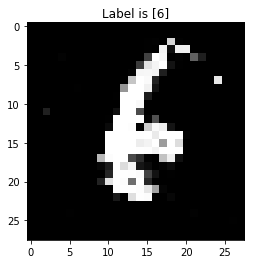

In [183]:
# Training

epochs = 4001
batch_size = 32

valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    
    # DISCRIMINATOR
    # Sampling real and fake images
    
    idx = np.random.randint(0, X_train_reshaped.shape[0], batch_size)
    imgs, labels = X_train_reshaped[idx], y_train_reshaped[idx]
    
    noise_array = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict([noise_array, labels])
    
    # Training discriminator
    
    d_loss_real = discriminator.train_on_batch([imgs, labels], valid)
    d_loss_fake = discriminator.train_on_batch([gen_imgs, labels], fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # GENERATOR
    
    sampled_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)
    g_loss = gan.train_on_batch([noise_array, sampled_labels], valid)
    
    # Plot progress
    print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss[0]))
    
    if epoch % 200 == 0:
        sample = generator.predict([noise_array, labels])
        pixels = (sample[0] * 127.5) + 127.5
        pixels = pixels.reshape(28, 28)
        label = labels[0]
        plot_mnist(pixels, label)